IMPORTS

In [2]:
#Importing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

EXPLORING DATASET

In [3]:
#Dataset
df = pd.read_csv("milk.csv")

print("Rows : %d"%df.shape[0])
print("Columns : %d"%df.shape[1])

print(df.info())

Rows : 1059
Columns : 8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB
None


In [4]:
#Description of Dataset
print(df.describe())
print(df.head())

                pH   Temprature        Taste         Odor         Fat    
count  1059.000000  1059.000000  1059.000000  1059.000000  1059.000000  \
mean      6.630123    44.226629     0.546742     0.432483     0.671388   
std       1.399679    10.098364     0.498046     0.495655     0.469930   
min       3.000000    34.000000     0.000000     0.000000     0.000000   
25%       6.500000    38.000000     0.000000     0.000000     0.000000   
50%       6.700000    41.000000     1.000000     0.000000     1.000000   
75%       6.800000    45.000000     1.000000     1.000000     1.000000   
max       9.500000    90.000000     1.000000     1.000000     1.000000   

         Turbidity       Colour  
count  1059.000000  1059.000000  
mean      0.491029   251.840415  
std       0.500156     4.307424  
min       0.000000   240.000000  
25%       0.000000   250.000000  
50%       0.000000   255.000000  
75%       1.000000   255.000000  
max       1.000000   255.000000  
    pH  Temprature  Taste  

In [5]:
#Check for duplicates
print(df.duplicated().sum())

#Finding Null Values
print(df.isnull().sum())

#Unique values
print(df.nunique())

#values in target
df['Grade'].value_counts()

976
pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64
pH            16
Temprature    17
Taste          2
Odor           2
Fat            2
Turbidity      2
Colour         9
Grade          3
dtype: int64


Grade
low       429
medium    374
high      256
Name: count, dtype: int64

DATA VISUALIZATION 

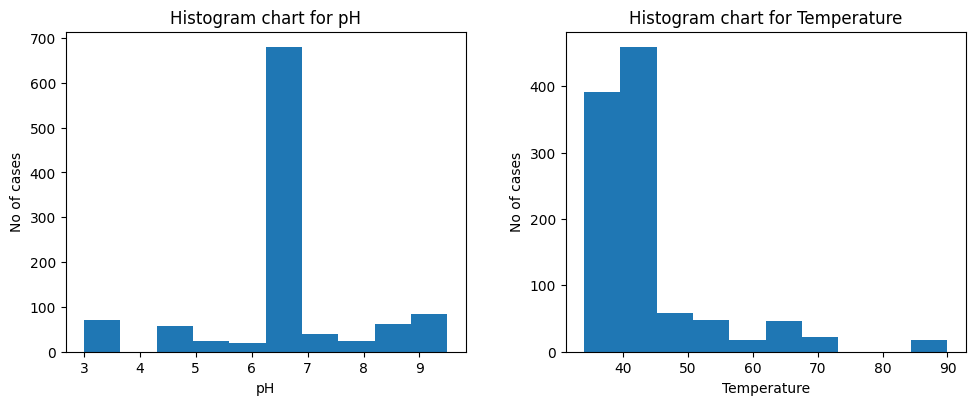

In [6]:
#Histogram Chat
from matplotlib.figure import Figure
fig = plt.figure(figsize =(5, 4))
 
# Creating first axes for the figure
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
 
# Creating second axes for the figure
ax2 = fig.add_axes([1.1, 0.1, 0.8, 0.8])
 
# Adding the data to be plotted
ax1.hist(df.pH)
ax2.hist(df.Temprature)

ax1.set_title("Histogram chart for pH")
ax2.set_title("Histogram chart for Temperature")

ax1.set_xlabel("pH")
ax1.set_ylabel("No of cases")
 
ax2.set_xlabel("Temperature")
ax2.set_ylabel("No of cases")
 
plt.show()


Text(0.5, 1.0, 'Grade Representation')

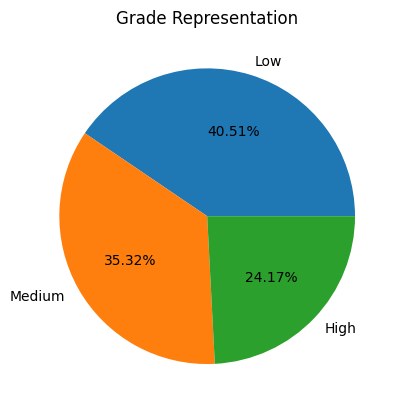

In [7]:
#Pie chat
data = [df['Grade'].value_counts().low , df['Grade'].value_counts().medium , df['Grade'].value_counts().high]
label = ["Low", "Medium", "High"]
plt.pie(data, labels = label, autopct='%1.2f%%')
plt.title("Grade Representation")

[Text(0.5, 1.0, 'Scattered plot chart')]

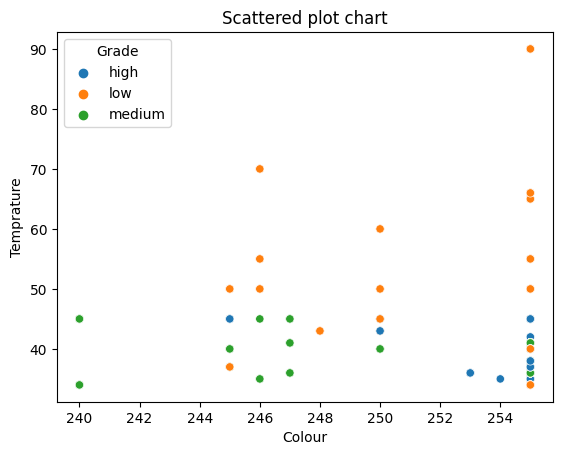

In [8]:
#Scatterplot chart
sns.scatterplot(x='Colour' , y='Temprature',data = df, hue = 'Grade').set(title = "Scattered plot chart")

In [9]:
#Converting string in target into values
df['Grade'] =df['Grade'].map({'low': 0, 'medium': 1,'high':2})
df.corr()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
pH,1.000000,0.244684,-0.064053,-0.081331,-0.093429,0.048384,-0.164565,0.028980
Temprature,0.244684,1.000000,-0.109792,-0.048870,0.024073,0.185106,-0.008511,-0.417789
Taste,-0.064053,-0.109792,1.000000,0.017582,0.324149,0.055755,-0.082654,0.025500
Odor,-0.081331,-0.048870,0.017582,1.000000,0.314505,0.457935,-0.039361,0.149626
Fat,-0.093429,0.024073,0.324149,0.314505,1.000000,0.329264,0.114151,0.151002
Turbidity,0.048384,0.185106,0.055755,0.457935,0.329264,1.000000,0.136436,-0.153634
Colour,-0.164565,-0.008511,-0.082654,-0.039361,0.114151,0.136436,1.000000,-0.056986
Grade,0.028980,-0.417789,0.025500,0.149626,0.151002,-0.153634,-0.056986,1.000000


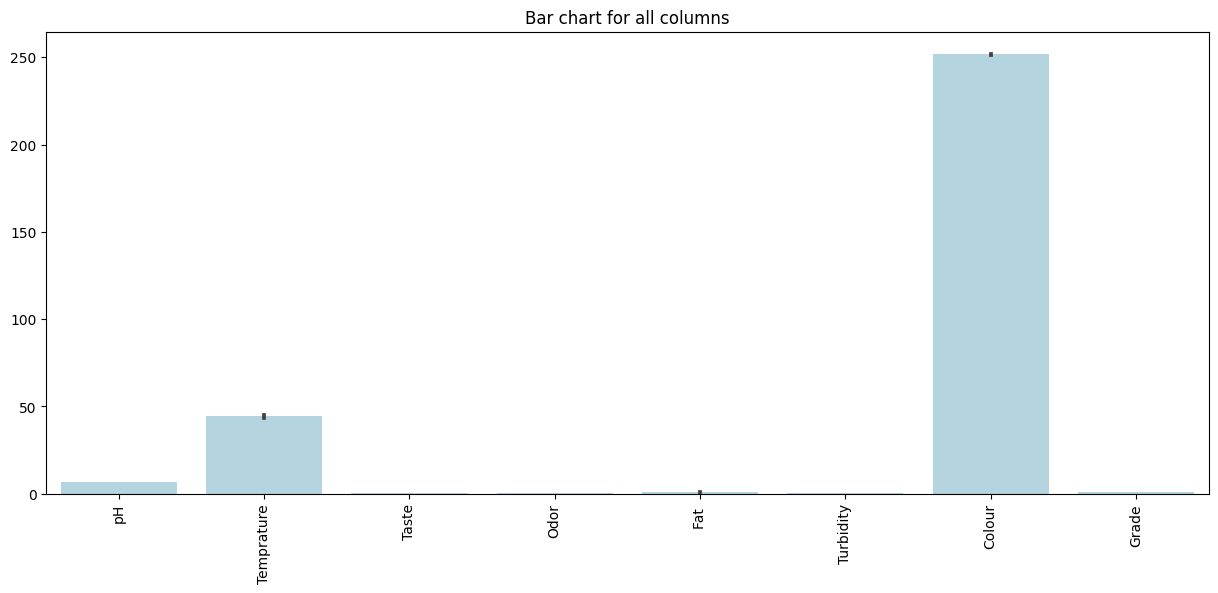

In [10]:
#Outline of Bar graph for all columns
plt.figure(figsize=(15,6))
sns.barplot(data = df, color = 'lightblue')
plt.xticks(rotation=90, fontsize=10)
plt.title("Bar chart for all columns")
plt.show()

In [11]:
#Train and Target columns
x=df.drop('Grade',axis=1)
y=df['Grade']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20)

In [20]:
x_test.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
958,6.5,38,1,1,1,1,255
939,6.7,45,1,1,1,0,245
780,6.6,37,1,1,1,1,255
526,6.8,50,0,0,1,0,255
595,6.5,37,0,0,0,0,255


CLASSIFICATION BASED ML MODEL BUILDING

In [13]:
#Decision tree classifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred_dtc = dtc.predict(x_test)

print("Training Accuracy :",dtc.score(x_train,y_train))
print("Testing Accuracy :",dtc.score(x_test,y_test))

print("Prediction accuracy : ",metrics.accuracy_score(y_test, y_pred_dtc))
print(metrics.classification_report(y_test, y_pred_dtc))

Training Accuracy : 1.0
Testing Accuracy : 0.9952830188679245
Prediction accuracy :  0.9952830188679245
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        89
           1       1.00      1.00      1.00        75
           2       0.98      1.00      0.99        48

    accuracy                           1.00       212
   macro avg       0.99      1.00      0.99       212
weighted avg       1.00      1.00      1.00       212



In [14]:
#Random tree classifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred_rfc = rfc.predict(x_test)

print("Training Accuracy :",rfc.score(x_train,y_train))
print("Testing Accuracy :",rfc.score(x_test,y_test))

print("Prediction accuracy : ",metrics.accuracy_score(y_test, y_pred_rfc))
print(metrics.classification_report(y_test, y_pred_rfc))

Training Accuracy : 1.0
Testing Accuracy : 0.9952830188679245
Prediction accuracy :  0.9952830188679245
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        89
           1       1.00      1.00      1.00        75
           2       0.98      1.00      0.99        48

    accuracy                           1.00       212
   macro avg       0.99      1.00      0.99       212
weighted avg       1.00      1.00      1.00       212



In [15]:
#The random forest collects the data of each tree and forecasts the future based on the majority of predictions,
# rather than relying on a single decision tree.